##EDA AND VISUALISATION
EDA and Data visualisation techniques are utilized before moving on with testing the hypothesis to get better understanding of the data. First summary statistics of three of the chosen major European economies are provided then visualised below. (Violent crime count is only for UK and crime rate is for Germany and France)

=== TABLE 1: SUMMARY STATISTICS ===
Country                        France     Germany             UK
Rap_Market_Share    count   21.000000   21.000000      21.000000
                    mean    36.809524   13.016667       6.264286
                    std     13.275375    5.457472       4.078573
                    min     15.000000    3.500000       2.500000
                    25%     26.052632    8.571429       2.916667
                    50%     37.105263   13.642857       3.800000
                    75%     48.157895   18.600000      10.800000
                    max     57.000000   19.700000      12.400000
Violent_Crime_Count count   21.000000   21.000000      21.000000
                    mean     0.000000    0.000000  467377.928571
                    std      0.000000    0.000000   73950.791100
                    min      0.000000    0.000000  337709.000000
                    25%      0.000000    0.000000  408237.500000
                    50%      0.000000    0.000000  471

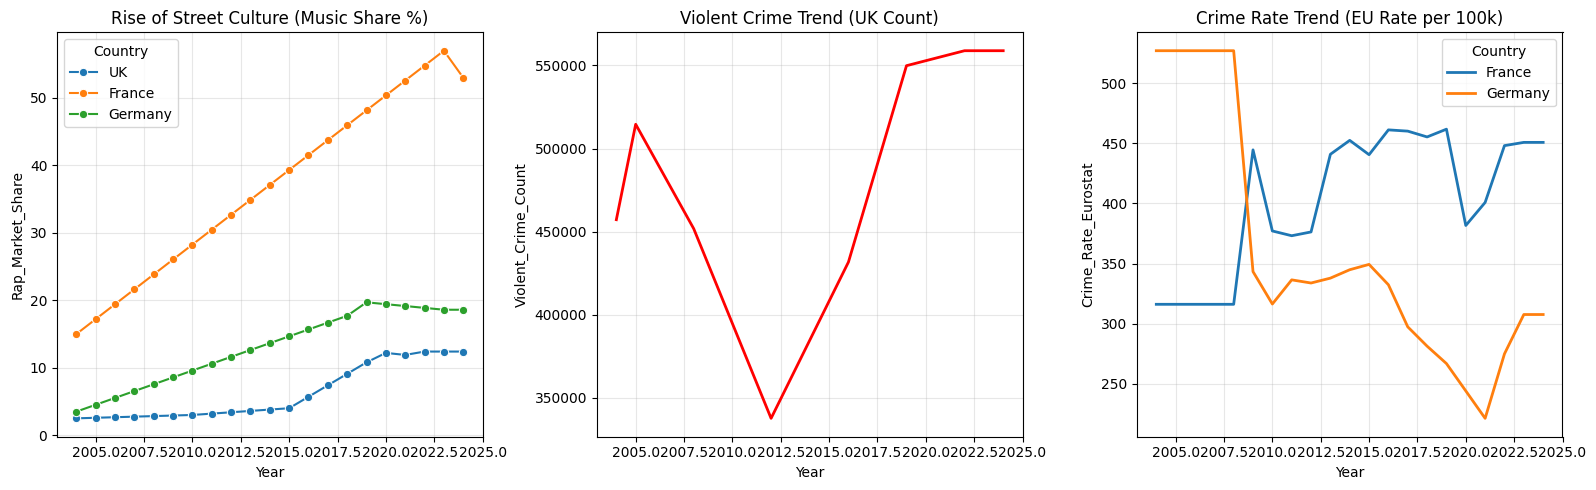

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data
df = pd.read_csv('final_panel_dataset.csv')

# 1. DESCRIPTIVE STATS
print("=== TABLE 1: SUMMARY STATISTICS ===")
stats = df.groupby('Country')[['Rap_Market_Share', 'Violent_Crime_Count', 'Crime_Rate_Eurostat']].describe().T
print(stats)

# 2. VISUALIZATION
plt.figure(figsize=(16, 5))

# Music Market Share (Valid for all)
plt.subplot(1, 3, 1)
sns.lineplot(data=df, x='Year', y='Rap_Market_Share', hue='Country', marker='o')
plt.title('Rise of Street Culture (Music Share %)')
plt.grid(True, alpha=0.3)

# Violent Crime (UK Only)
# Note: We only plot UK here because EU uses Rates, not Counts.
plt.subplot(1, 3, 2)
sns.lineplot(data=df[df['Country']=='UK'], x='Year', y='Violent_Crime_Count', color='red', linewidth=2)
plt.title('Violent Crime Trend (UK Count)')
plt.grid(True, alpha=0.3)

# Crime Rate (Eurostat - for France/Germany)
plt.subplot(1, 3, 3)
# Filter for France/Germany to avoid scale issues with UK
eu_data = df[df['Country'].isin(['France', 'Germany'])]
sns.lineplot(data=eu_data, x='Year', y='Crime_Rate_Eurostat', hue='Country', linewidth=2)
plt.title('Crime Rate Trend (EU Rate per 100k)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Here the metrics included in our data our visualised followed by the correlation matrix depicting the correlation between each metric


=== TABLE 1: SUMMARY STATISTICS ===
Country                    France       Germany             UK
music_drill              8.501533     10.818903       6.527056
fashion_streetwear       6.467623      5.965278       6.001443
media_tv                 1.476671      2.485690       1.365440
language_slang           0.472823      0.421116       7.442881
events_festivals         1.300024      6.404040       3.320226
Rap_Market_Share        36.809524     13.016667       6.264286
Violent_Crime_Count      0.000000      0.000000  467377.928571
Crime_Rate_Eurostat    402.721619    358.604762       0.000000
Drug_Prevalence_Pct     52.800000     40.500000      19.966667
School_Exclusions        0.000000      0.000000      46.671429
NEET_Rate                8.142857      5.900952       7.309524
GDP_Per_Capita       17718.242857  20274.328571       0.795238
Gini_Index              29.247619     30.323810      32.338095


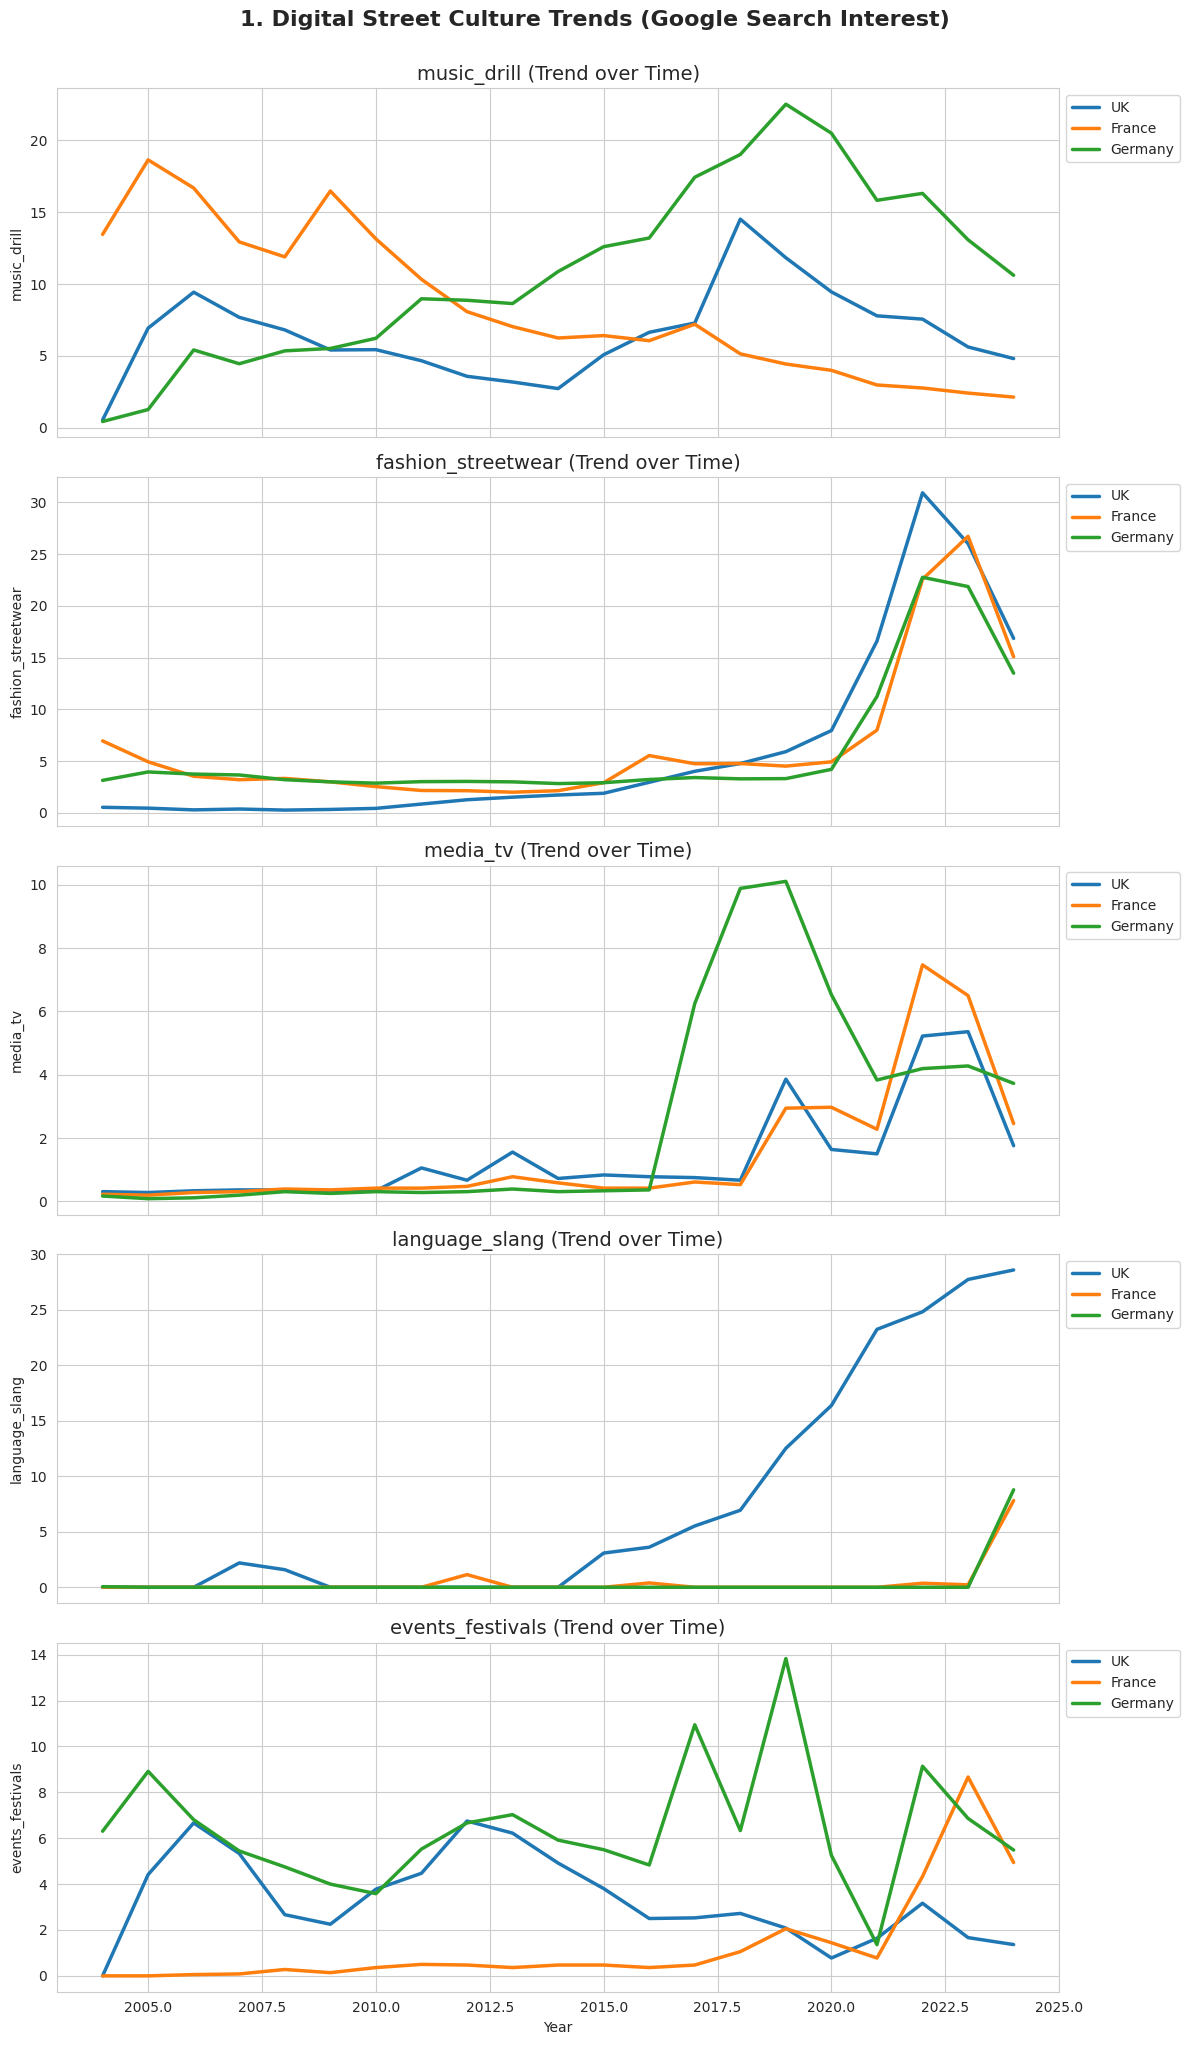

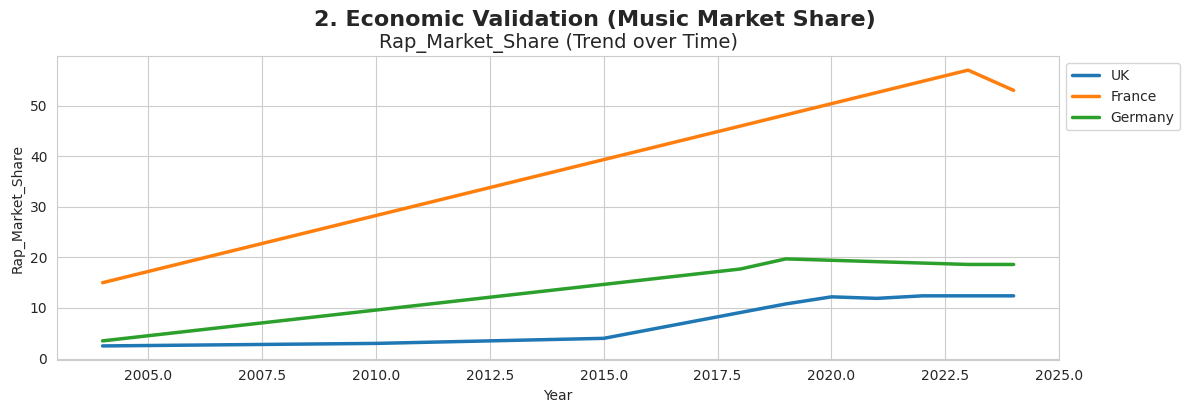

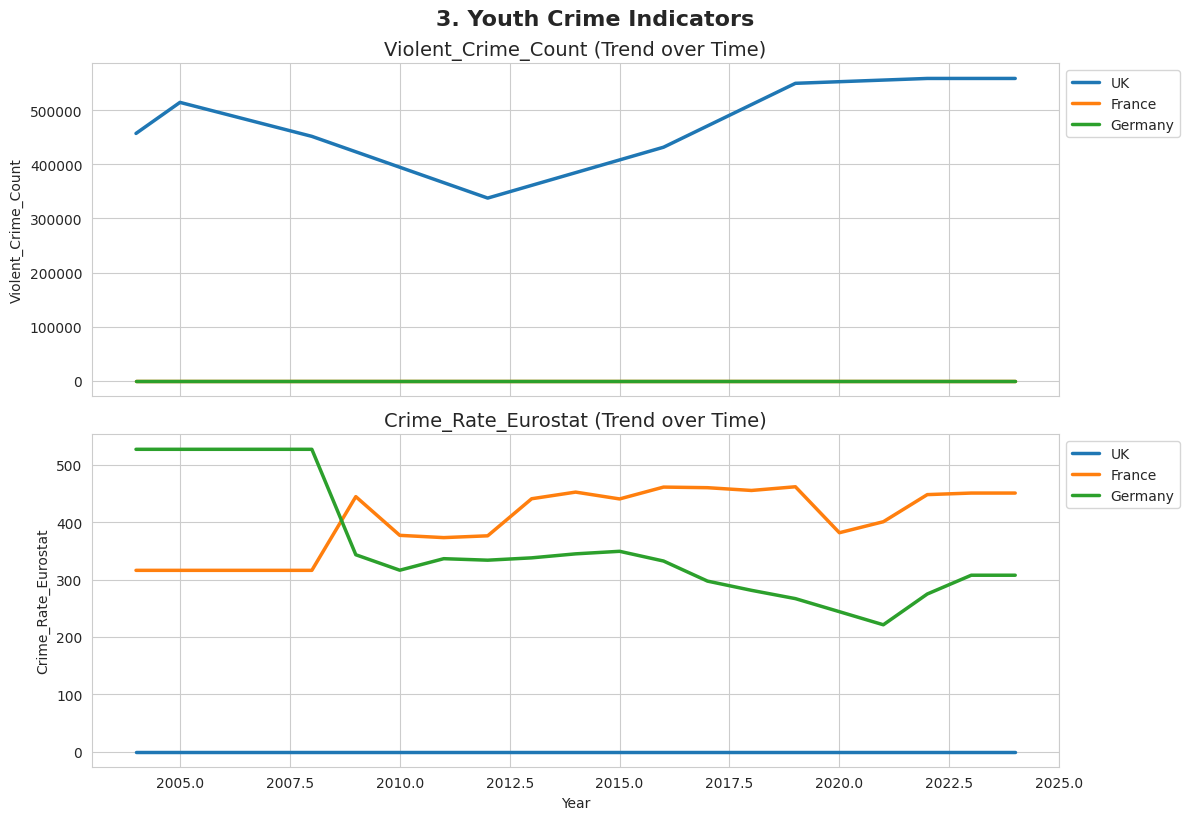

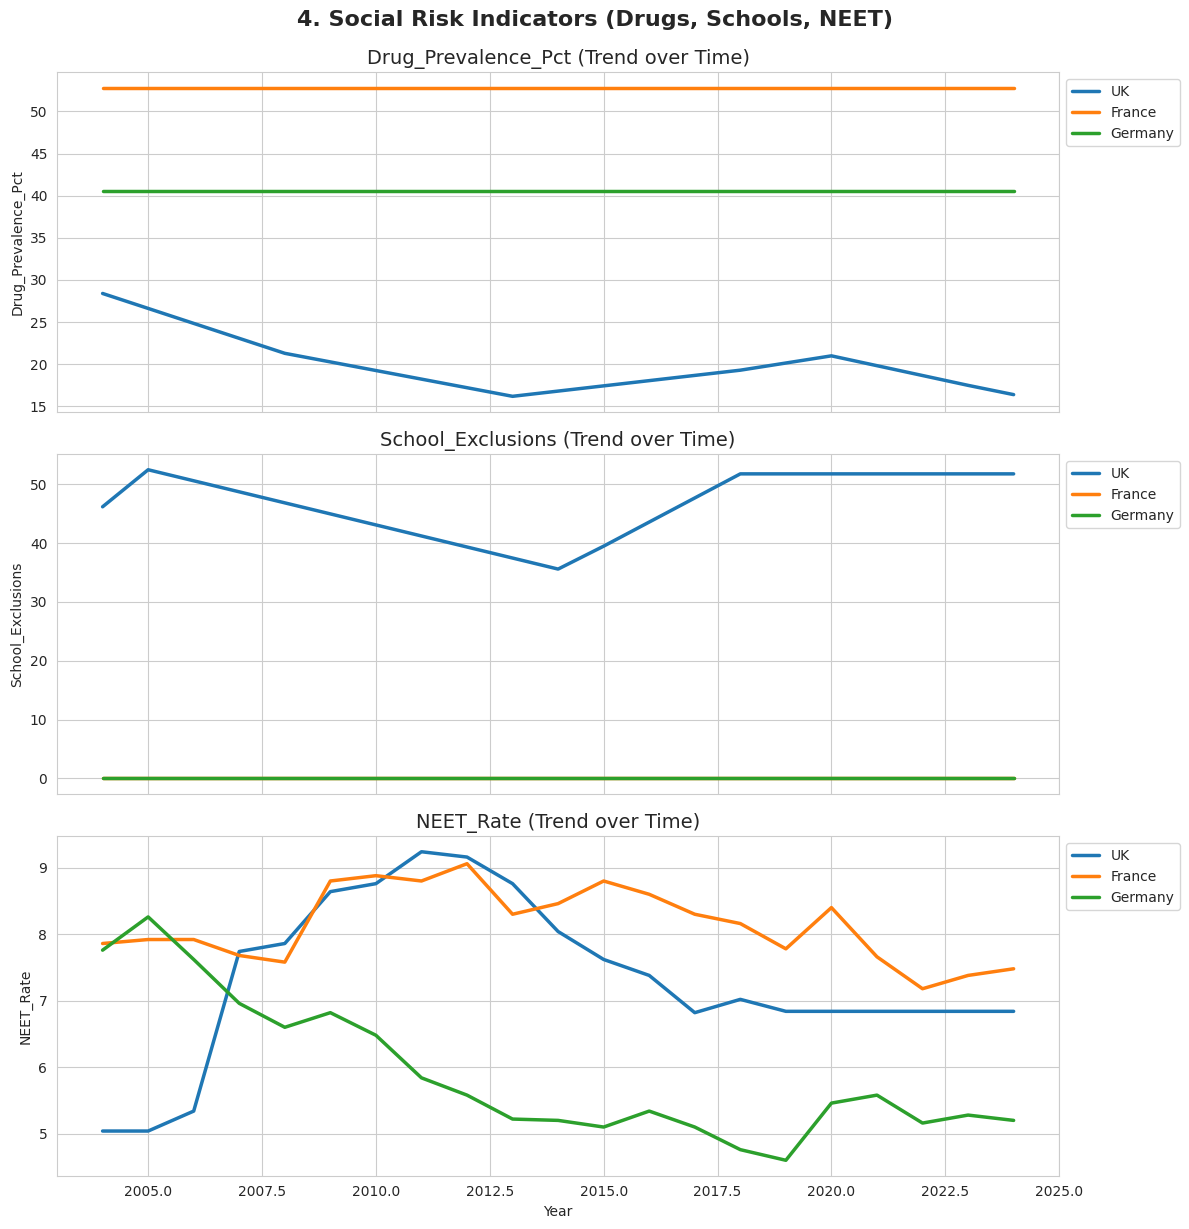

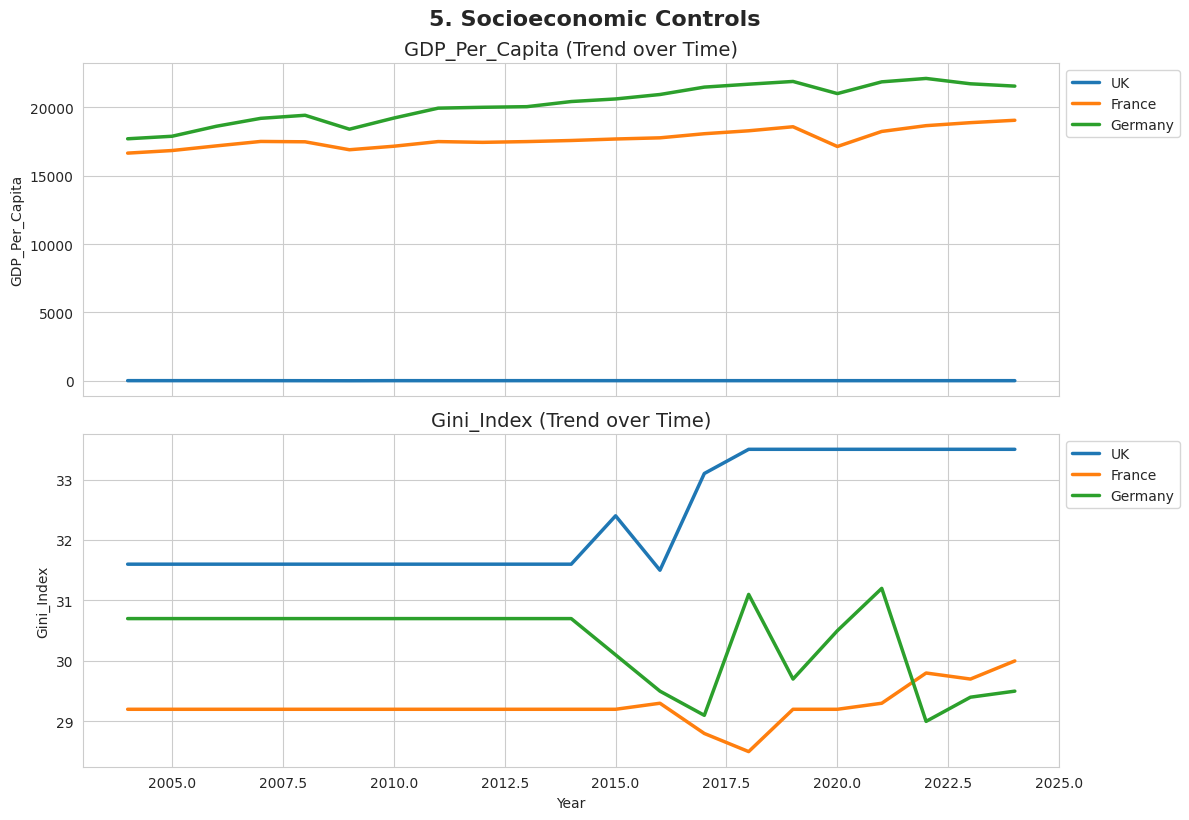

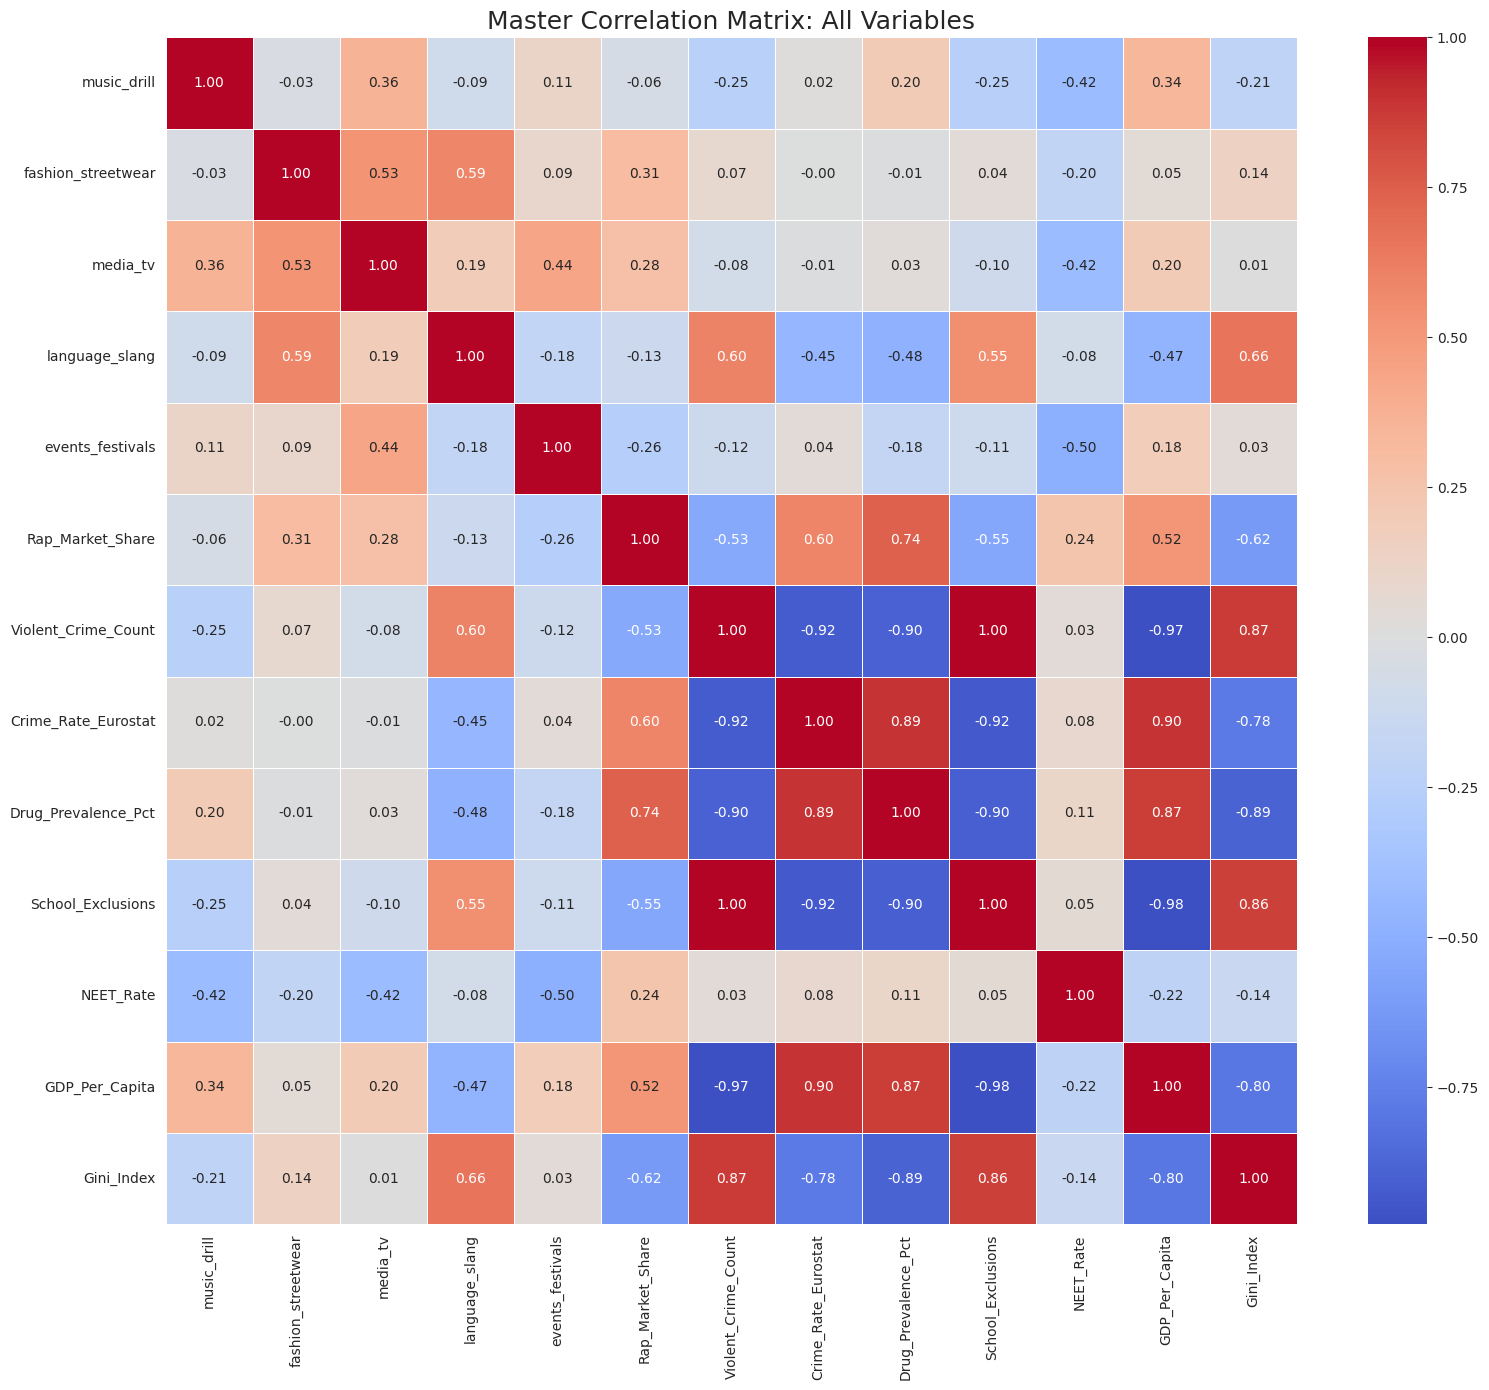

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load Data
df = pd.read_csv('final_panel_dataset.csv')



# 1. DEFINE METRIC GROUPS

# We group variables so the graphs are readable and logical
culture_digital = ['music_drill', 'fashion_streetwear', 'media_tv', 'language_slang', 'events_festivals']
culture_economic = ['Rap_Market_Share']
risk_crime       = ['Violent_Crime_Count', 'Crime_Rate_Eurostat']
risk_social      = ['Drug_Prevalence_Pct', 'School_Exclusions', 'NEET_Rate']
controls         = ['GDP_Per_Capita', 'Gini_Index']

all_metrics = culture_digital + culture_economic + risk_crime + risk_social + controls


# 2. DESCRIPTIVE STATISTICS (ALL METRICS)

print("\n=== TABLE 1: SUMMARY STATISTICS ===")
# We group by Country to see the range of data for each region
stats = df.groupby('Country')[all_metrics].mean().T
pd.set_option('display.max_rows', None) # Show all rows
print(stats)


# 3. VISUALIZATION DASHBOARD

sns.set_style("whitegrid")

# Helper to plot a list of columns
def plot_group(columns, title, filename):
    # Filter columns that actually exist in dataframe
    valid_cols = [c for c in columns if c in df.columns]

    if not valid_cols: return

    # Create subplots
    fig, axes = plt.subplots(len(valid_cols), 1, figsize=(12, 4 * len(valid_cols)), sharex=True)
    if len(valid_cols) == 1: axes = [axes] # Handle single plot case

    for i, col in enumerate(valid_cols):
        sns.lineplot(data=df, x='Year', y=col, hue='Country', ax=axes[i], linewidth=2.5)
        axes[i].set_title(f'{col} (Trend over Time)', fontsize=14)
        axes[i].set_ylabel(col)
        axes[i].legend(loc='upper left', bbox_to_anchor=(1, 1))

    plt.tight_layout()
    plt.suptitle(title, y=1.02, fontsize=16, weight='bold')
    plt.savefig(filename, bbox_inches='tight')
    plt.show()

# --- PLOT 1: DIGITAL STREET CULTURE ---
plot_group(culture_digital,
           "1. Digital Street Culture Trends (Google Search Interest)",
           "eda_culture_digital.png")

# --- PLOT 2: ECONOMIC REALITY ---
plot_group(culture_economic,
           "2. Economic Validation (Music Market Share)",
           "eda_culture_economic.png")

# --- PLOT 3: CRIME INDICATORS ---
# Note: Violent_Crime_Count is mostly UK (others 0), Crime_Rate_Eurostat is EU
plot_group(risk_crime,
           "3. Youth Crime Indicators",
           "eda_crime.png")

# --- PLOT 4: SOCIAL DETERIORATION ---
plot_group(risk_social,
           "4. Social Risk Indicators (Drugs, Schools, NEET)",
           "eda_social_risk.png")

# --- PLOT 5: CONTROLS (Context) ---
plot_group(controls,
           "5. Socioeconomic Controls",
           "eda_controls.png")


# 4. MASTER CORRELATION HEATMAP

plt.figure(figsize=(16, 14))

# Select numeric columns
corr_cols = [c for c in all_metrics if c in df.columns]
corr_df = df[corr_cols]

# Correlation Matrix
corr = corr_df.corr()

# Plot
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Master Correlation Matrix: All Variables', fontsize=18)
plt.tight_layout()
plt.savefig('master_correlation_matrix.png')
plt.show()

Here pearson correlation of each country is depicted by measuring the linearity in the visualisation followed by a lag analysis further analysing the correlation for each correlation coefficient.


=== TABLE 1: SUMMARY STATISTICS ===
Country                          France     Germany             UK
Rap_Market_Share    count  2.100000e+01   21.000000      21.000000
                    mean   3.680952e+01   13.016667       6.264286
                    std    1.327538e+01    5.457472       4.078573
                    min    1.500000e+01    3.500000       2.500000
                    25%    2.605263e+01    8.571429       2.916667
                    50%    3.710526e+01   13.642857       3.800000
                    75%    4.815789e+01   18.600000      10.800000
                    max    5.700000e+01   19.700000      12.400000
Violent_Crime_Count count  2.100000e+01   21.000000      21.000000
                    mean   0.000000e+00    0.000000  467377.928571
                    std    0.000000e+00    0.000000   73950.791100
                    min    0.000000e+00    0.000000  337709.000000
                    25%    0.000000e+00    0.000000  408237.500000
                    50%  

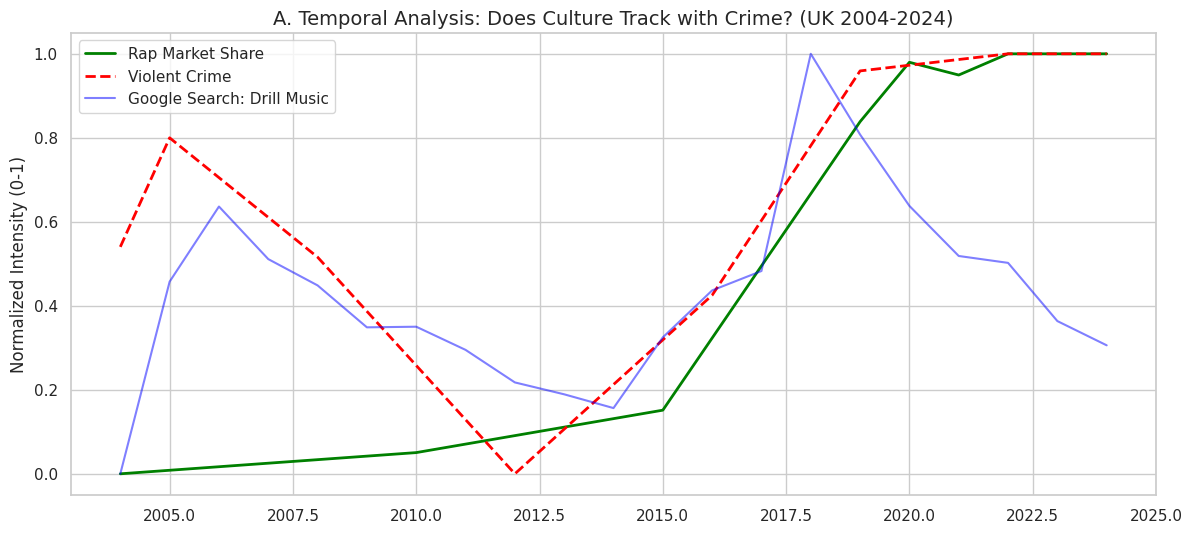

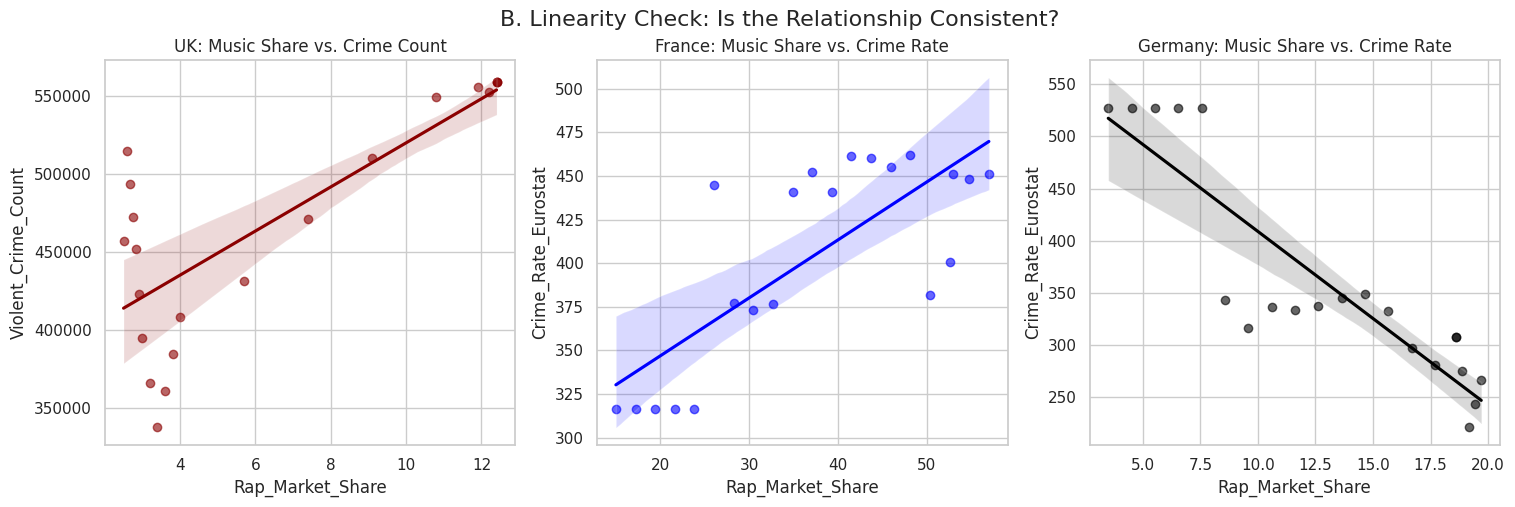

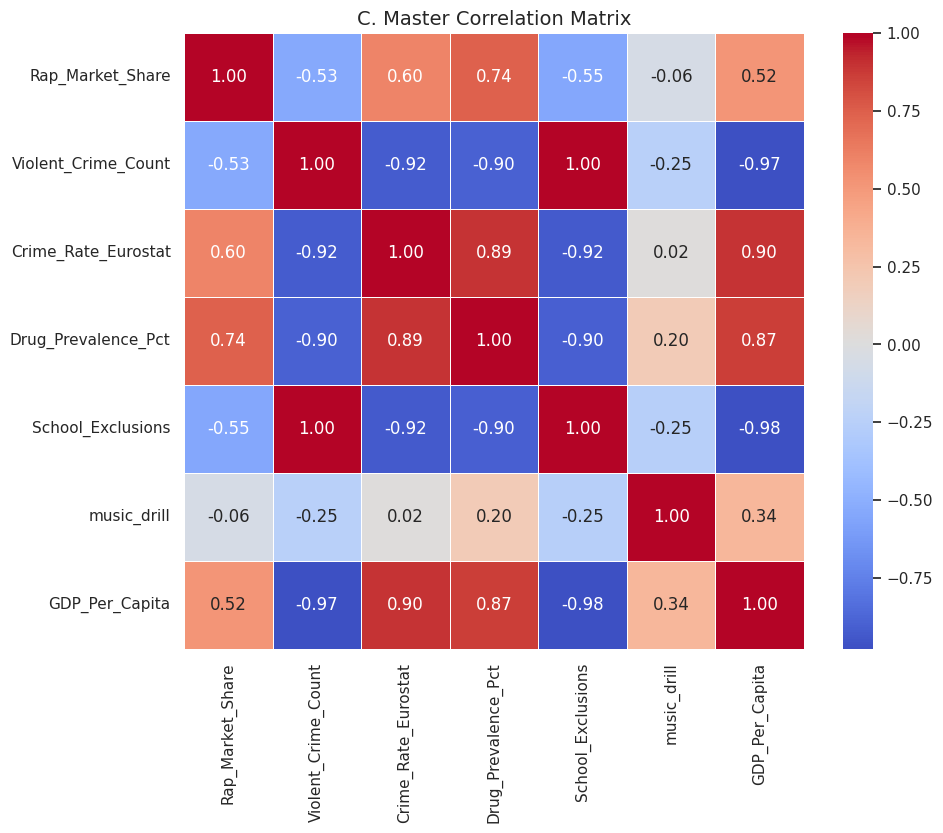

/tmp/ipython-input-730438931.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lags, y=corrs, palette='viridis')


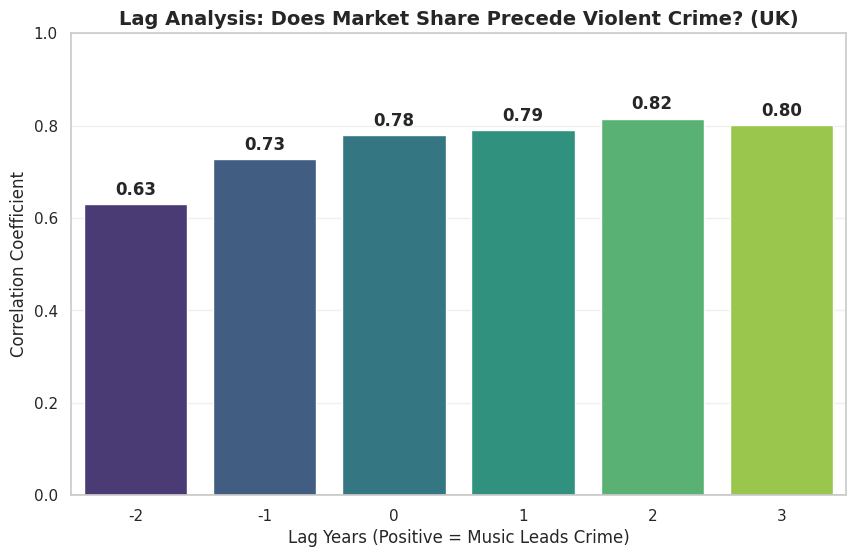

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# 1. SETUP & LOAD


df = pd.read_csv('final_panel_dataset.csv')




# Set Plot Style
sns.set_theme(style="whitegrid")
plt.rcParams.update({'figure.max_open_warning': 0})

# Helper to Normalize Data (0-1) for easy visual comparison
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())


# 2. DESCRIPTIVE STATISTICS (Table 1)

print("\n=== TABLE 1: SUMMARY STATISTICS ===")
metrics = ['Rap_Market_Share', 'Violent_Crime_Count', 'Crime_Rate_Eurostat',
           'Drug_Prevalence_Pct', 'School_Exclusions', 'music_drill']
stats = df.groupby('Country')[metrics].describe().T
print(stats)



# 3. VISUALIZATION DASHBOARD

# --- CHART A: TEMPORAL TRENDS ---
plt.figure(figsize=(14, 6))
uk_data = df[df['Country'] == 'UK']

plt.plot(uk_data['Year'], normalize(uk_data['Rap_Market_Share']), label='Rap Market Share', color='green', linewidth=2)
plt.plot(uk_data['Year'], normalize(uk_data['Violent_Crime_Count']), label='Violent Crime', color='red', linewidth=2, linestyle='--')
plt.plot(uk_data['Year'], normalize(uk_data['music_drill']), label='Google Search: Drill Music', color='blue', alpha=0.5)

plt.title('A. Temporal Analysis: Does Culture Track with Crime? (UK 2004-2024)', fontsize=14)
plt.ylabel('Normalized Intensity (0-1)')
plt.legend()
plt.savefig('eda_trends_uk.png')
plt.show()

# --- CHART B: SCATTER PLOTS (The "Linearity" Check) ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# UK: Music vs Crime Count
sns.regplot(data=uk_data, x='Rap_Market_Share', y='Violent_Crime_Count', ax=axes[0], color='darkred', scatter_kws={'alpha':0.6})
axes[0].set_title('UK: Music Share vs. Crime Count')

# France: Music vs Crime Rate
fr_data = df[df['Country'] == 'France']
sns.regplot(data=fr_data, x='Rap_Market_Share', y='Crime_Rate_Eurostat', ax=axes[1], color='blue', scatter_kws={'alpha':0.6})
axes[1].set_title('France: Music Share vs. Crime Rate')

# Germany: Music vs Crime Rate
de_data = df[df['Country'] == 'Germany']
sns.regplot(data=de_data, x='Rap_Market_Share', y='Crime_Rate_Eurostat', ax=axes[2], color='black', scatter_kws={'alpha':0.6})
axes[2].set_title('Germany: Music Share vs. Crime Rate')

plt.suptitle('B. Linearity Check: Is the Relationship Consistent?', fontsize=16)
plt.savefig('eda_scatter_linearity.png')
plt.show()

# --- CHART C: CORRELATION HEATMAP ---
plt.figure(figsize=(10, 8))
corr_cols = ['Rap_Market_Share', 'Violent_Crime_Count', 'Crime_Rate_Eurostat',
             'Drug_Prevalence_Pct', 'School_Exclusions', 'music_drill', 'GDP_Per_Capita']
corr = df[corr_cols].corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0, linewidths=0.5)
plt.title('C. Master Correlation Matrix', fontsize=14)
plt.savefig('eda_heatmap.png')
plt.show()

# --- CHART D: LAG ANALYSIS ---
# Does Music (t) predict Crime (t+k)?

# 1. Sort Data
uk_data = df[df['Country'] == 'UK'].sort_values('Year').copy()

# 2. Define Lags (Testing -2 to +3 years)
# Negative Lag = Crime happened BEFORE Music (Reverse Causality)
# Positive Lag = Music happened BEFORE Crime (Leading Indicator)
lags = [-2, -1, 0, 1, 2, 3]
corrs = []

for lag in lags:
    # Shift Crime backwards by 'lag' years
    # If lag = 1: We align Music_2010 with Crime_2011
    shifted_crime = uk_data['Violent_Crime_Count'].shift(-lag)

    # Calculate Correlation
    c = uk_data['Rap_Market_Share'].corr(shifted_crime)
    corrs.append(c)

# 3. Plot
plt.figure(figsize=(10, 6))
colors = ['red' if x < 0 else 'green' for x in lags] # Visual cue for Past vs Future
sns.barplot(x=lags, y=corrs, palette='viridis')

plt.title('Lag Analysis: Does Market Share Precede Violent Crime? (UK)', fontsize=14, fontweight='bold')
plt.xlabel('Lag Years (Positive = Music Leads Crime)', fontsize=12)
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.axhline(0, color='black', linewidth=1)
plt.ylim(0, 1.0) # Fix scale to see strength clearly

# Add Labels
for i, v in enumerate(corrs):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.savefig('eda_lag_analysis_fixed.png')
plt.show()